In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [29]:
file_path = 'smoking_driking_dataset_Ver01.csv'
column_names = [ 'sex', 'age', 'height', 'weight', 'waistline',
    'sight_left', 'sight_right',
    'hear_left', 'hear_right',
    'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
    'triglyceride', 'hemoglobin', 'urine_protein', 'serum_creatinine',
    'SGOT_AST', 'SGOT_ALT', 'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'
]

# Load the dataset with specified column names
df = pd.read_csv(file_path, header=0, names=column_names)

# Display the first few rows of the dataframe
print(df.head())

# Drop rows with any missing values
df = df.dropna()
#len(df)



In [31]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [3]:
# Select random 100,000 records from the dataframe
sample_df = df.sample(n=100000, random_state=1)

# Save the sampled dataframe to a new CSV file
sample_file_path = 'smoking_driking_dataset_sampled.csv'
sample_df.to_csv(sample_file_path, index=False)

sample_df.head()
sample_df_no_feature_engg = sample_df.copy()

In [4]:
# FEATURE ENGINEERING

# new column 'Hearing_State'
sample_df['Hearing_State'] = df.apply(lambda row: 2 if row['hear_left'] == 2 or row['hear_right'] == 2 else 1, axis=1)

# new column 'Sight_State'
#sample_df['Sight_State'] = df.apply(lambda row: 2 if row['sight_left'] == 2 or row['sight_right'] == 2 else 1, axis=1)

# new column 'HDL_LDL_ratio'
sample_df['HDL_LDL_Ratio'] = sample_df['HDL_chole'] / sample_df['LDL_chole']

# new column 'BMI'
sample_df['BMI'] = sample_df['weight'] / ((sample_df['height'] / 100) ** 2)

# new column 'Total_HDL_ratio'
sample_df['Total_HDL_Ratio'] = sample_df['tot_chole'] / sample_df['HDL_chole']

# new column 'Liver_Enzyme_Ratio' (SGOT:SGPT)
sample_df['Liver_Enzyme_Ratio'] = sample_df['SGOT_AST'] / sample_df['SGOT_ALT']

#Smoked [0], Never Smoked [1]
# Categorize smoking status
sample_df['Smoking_Status'] = sample_df['SMK_stat_type_cd'].apply(lambda x: '0' if x == 1 else '1')

# Factorize drinking status
sample_df['DRK_YN'] = sample_df['DRK_YN'].replace({'Y': 1, 'N': 0})

sample_df.info()




<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 921688 to 71444
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sex                 100000 non-null  object 
 1   age                 100000 non-null  int64  
 2   height              100000 non-null  int64  
 3   weight              100000 non-null  int64  
 4   waistline           100000 non-null  float64
 5   sight_left          100000 non-null  float64
 6   sight_right         100000 non-null  float64
 7   hear_left           100000 non-null  float64
 8   hear_right          100000 non-null  float64
 9   SBP                 100000 non-null  float64
 10  DBP                 100000 non-null  float64
 11  BLDS                100000 non-null  float64
 12  tot_chole           100000 non-null  float64
 13  HDL_chole           100000 non-null  float64
 14  LDL_chole           100000 non-null  float64
 15  triglyceride        100000 non-null

/var/folders/9t/9lxcgrx135q6kvlyv9lv_3v80000gn/T/ipykernel_71624/4122185956.py:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sample_df['DRK_YN'] = sample_df['DRK_YN'].replace({'Y': 1, 'N': 0})


In [5]:
sample_df['Smoking_Status'] = pd.to_numeric(sample_df['Smoking_Status'])
#Has ever been into drinking or smoking
sample_df['DorS'] = sample_df.apply(lambda row: 1 if row['Smoking_Status'] == 1 and row['DRK_YN'] == 1 else 0, axis=1)



In [6]:
# Drop rows with any missing values
sample_df = sample_df.dropna()
len(sample_df)

# Standardize numerical features
scaler = StandardScaler()
numerical_features = ['SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole', 'hemoglobin',
                      'SGOT_AST', 'SGOT_ALT', 'gamma_GTP']
sample_df[numerical_features] = scaler.fit_transform(sample_df[numerical_features])
print(sample_df.head())
sample_df.info()


           sex  age  height  weight  waistline  sight_left  sight_right  \
921688  Female   50     155      60       82.0         0.7          0.5   
56603   Female   55     155      50       73.2         1.0          0.8   
434962  Female   60     160      60       78.0         0.6          0.8   
742617    Male   35     175      80       94.0         1.2          1.2   
604547    Male   45     160      60       82.1         0.9          0.8   

        hear_left  hear_right       SBP  ...  gamma_GTP  SMK_stat_type_cd  \
921688        1.0         1.0  0.521217  ...  -0.040489               1.0   
56603         1.0         1.0 -0.508473  ...  -0.461712               1.0   
434962        1.0         1.0 -1.744101  ...  -0.521886               1.0   
742617        1.0         1.0 -0.096597  ...  -0.120722               3.0   
604547        1.0         1.0  0.864448  ...   0.220267               1.0   

        DRK_YN  Hearing_State  HDL_LDL_Ratio        BMI  Total_HDL_Ratio  \
921688    

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 921688 to 71444
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   sex                 100000 non-null  object 
 1   age                 100000 non-null  int64  
 2   height              100000 non-null  int64  
 3   weight              100000 non-null  int64  
 4   waistline           100000 non-null  float64
 5   sight_left          100000 non-null  float64
 6   sight_right         100000 non-null  float64
 7   hear_left           100000 non-null  float64
 8   hear_right          100000 non-null  float64
 9   SBP                 100000 non-null  float64
 10  DBP                 100000 non-null  float64
 11  BLDS                100000 non-null  float64
 12  tot_chole           100000 non-null  float64
 13  HDL_chole           100000 non-null  float64
 14  LDL_chole           100000 non-null  float64
 15  triglyceride        100000 non-null

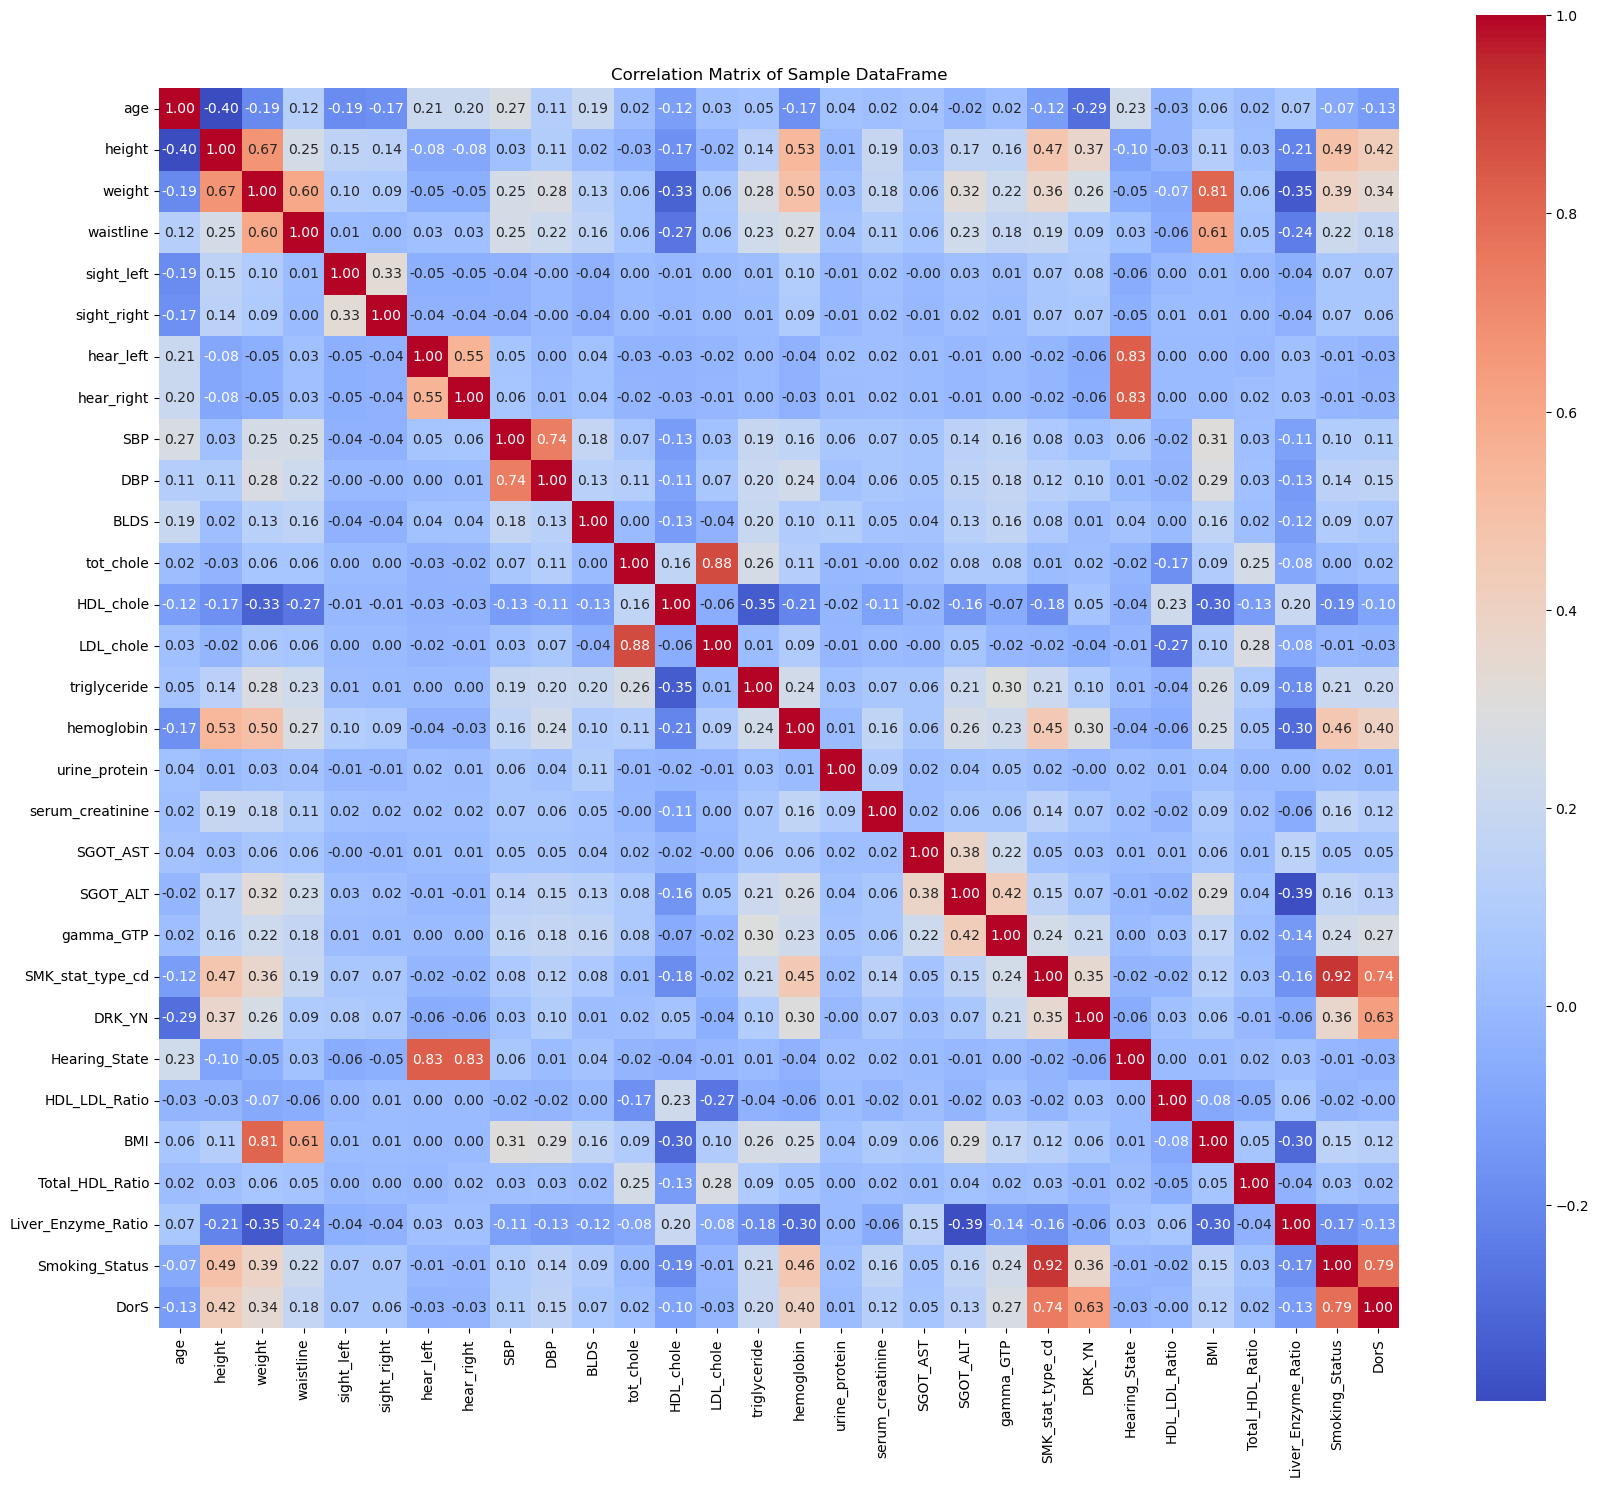

In [7]:
numeric_columns = sample_df.columns[1:]

sample_df.info()
correlation_matrix = sample_df[numeric_columns].corr()

# Displaying the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Creating a correlation plot
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Sample DataFrame')
plt.show()



In [9]:
#Naive Bayes before FE - Smoking
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_new = sample_df_no_feature_engg.iloc[:, 1:]
X = df_new.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])
y = df_new['SMK_stat_type_cd']

df_new.head()
X.head()
y.head()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)



Accuracy: 0.6468333333333334
Confusion Matrix:
 [[14676  1044  2578]
 [ 2007  1091  2145]
 [ 2153   668  3638]]
Classification Report:
               precision    recall  f1-score   support

         1.0       0.78      0.80      0.79     18298
         2.0       0.39      0.21      0.27      5243
         3.0       0.44      0.56      0.49      6459

    accuracy                           0.65     30000
   macro avg       0.53      0.52      0.52     30000
weighted avg       0.64      0.65      0.64     30000



In [10]:
#Naive Bayes after FE - Smoking
df_new = sample_df.iloc[:, 1:]
X = df_new.drop(columns=['Smoking_Status', 'SMK_stat_type_cd', 'DRK_YN', 'DorS'])
y = df_new['Smoking_Status']

df_new.head()
X.head()
y.head()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7298
Confusion Matrix:
 [[14841  3457]
 [ 4649  7053]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.81      0.79     18298
           1       0.67      0.60      0.64     11702

    accuracy                           0.73     30000
   macro avg       0.72      0.71      0.71     30000
weighted avg       0.73      0.73      0.73     30000



In [11]:
#Naive Bayes before FE - Drinking
df_new = sample_df_no_feature_engg.iloc[:, 1:]
X = df_new.drop(columns=['SMK_stat_type_cd', 'DRK_YN'])
y = df_new['DRK_YN']

df_new.head()
X.head()
y.head()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6837
Confusion Matrix:
 [[10014  4908]
 [ 4581 10497]]
Classification Report:
               precision    recall  f1-score   support

           N       0.69      0.67      0.68     14922
           Y       0.68      0.70      0.69     15078

    accuracy                           0.68     30000
   macro avg       0.68      0.68      0.68     30000
weighted avg       0.68      0.68      0.68     30000



In [12]:
#Naive Bayes after FE - Drinking
df_new = sample_df.iloc[:, 1:]
X = df_new.drop(columns=['SMK_stat_type_cd', 'DRK_YN', 'DorS'])
y = df_new['DRK_YN']

df_new.head()
X.head()
y.head()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6934666666666667
Confusion Matrix:
 [[10715  4207]
 [ 4989 10089]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70     14922
           1       0.71      0.67      0.69     15078

    accuracy                           0.69     30000
   macro avg       0.69      0.69      0.69     30000
weighted avg       0.69      0.69      0.69     30000



In [13]:
#Naive Bayes after FE - Both
df_new = sample_df.iloc[:, 1:]
X = df_new.drop(columns=['SMK_stat_type_cd', 'DRK_YN', 'DorS', 'Smoking_Status'])
y = df_new['DorS']

df_new.head()
X.head()
y.head()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Fit the model to the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.7384333333333334
Confusion Matrix:
 [[17383  4131]
 [ 3716  4770]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82     21514
           1       0.54      0.56      0.55      8486

    accuracy                           0.74     30000
   macro avg       0.68      0.69      0.68     30000
weighted avg       0.74      0.74      0.74     30000

